# Breast Density Extraction and Dataset Creation


This notebook processes mammography report data to extract breast density classifications and creates balanced datasets for machine learning training. The code transforms raw medical reports into structured JSON datasets suitable for computer vision models.


Data Flow Summary

Input: Raw mammography reports in CSV format
Text Processing: Extract breast density using regex patterns
Data Expansion: Create entries for all mammography views (LCC, LMLO, RCC, RMLO)
Image Mapping: Generate standardized image filenames
Dataset Creation: Split into balanced/unbalanced train/test sets
Output: JSON files ready for machine learning training

CSV file with mammography reports
Expected Columns:

ID: Patient identifier
report: Original report text
Year: Year of examination
Age: Patient age
BIRADS: BI-RADS classification
name_pkl: Pickle file name
translated_text: English translation of the report

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random
import re
from pathlib import Path

# Loads the initial dataset containing mammography reports with translated text
csv_path = "/Users/YusMolina/Documents/tesis/biomedCLIP/data/reports_english_1160_complete.csv"
df = pd.read_csv(csv_path)

In [ ]:
def extract_breast_density(text):
    """
     Extracts standardized breast density classifications from medical report text using regex patterns
    
    Args:
        text (str): The radiological report text
    """
    # Convert to lowercase and strip extra whitespace
    text = text.lower().strip()
    
    # Dictionary of patterns and their standardized outputs
    density_patterns = {
        r'characterized by scattered\s+(?:creates|areas)\s+of\s+pattern\s+density': 'Characterized by scattered areas of pattern density',
        r'extremely dense': 'Extremely dense',
        r'fatty predominance': 'Fatty predominance',
        r'(moderately dense.*?pattern 3|heterogeneously dense)': 'Heterogeneously dense'
    }
    # For 5 classes
    """
    density_patterns = {
        r'moderately dense': 'Moderately dense',
        r'characterized by scattered\s+(?:creates|areas)\s+of\s+pattern\s+density': 'Characterized by scattered areas of pattern density',
        r'extremely dense': 'Extremely dense',
        r'fatty predominance': 'Fatty predominance',
        r'heterogeneously dense': 'Heterogeneously dense'
    }
    """

    # Try to match each pattern
    for pattern, result in density_patterns.items():
        if re.search(pattern, text):
            return result
    
    # If no match is found
    return None

def process_dataframe(df, report_column):
    """
    Applies breast density extraction to all rows in the dataframe.
    
    Args:
        df (pandas.DataFrame): Input dataframe
        report_column (str): Name of the column containing the reports

    """
    # Create a copy to avoid modifying the original
    result_df = df.copy()
    
    # Add the new column with extracted patterns
    result_df['breast_density'] = result_df[report_column].apply(extract_breast_density)
    
    return result_df



In [3]:
processed_df = process_dataframe(df, 'translated_text')

In [4]:
df_cleaned = processed_df.dropna()
df_cleaned

,ID,report,Year,Age,BIRADS,name_pkl,translated_text,breast_density
0,S0000204,mamografía digital tomosíntesis 3d ultrasonido...,2014,73,3,S0000204_2014.pkl,Digital mammography 3D Tomosynthesis Bilateral...,Heterogeneously dense
1,S0000507,mamografía digital tomosíntesis ultrasonido ma...,2017,46,5,S0000507_2017.pkl,Digital mammography Tomosíntesis Ultrasound Bi...,Heterogeneously dense
2,S0000714,mamografía digital ultrasonido mamario bilater...,2018,39,3,S0000714_2018.pkl,Digital mammography Bilateral breast ultrasoun...,Heterogeneously dense
3,S0001119,mamografía digital con tomosíntesis ultrasonid...,2014,69,4,S0001119_2014.pkl,Digital mammography with bilateral breast ultr...,Characterized by scattered areas of pattern de...
4,S0001244,mamografía digital tomosíntesis ultrasonido ma...,2016,64,5,S0001244_2016.pkl,Digital mammography Tomosíntesis Ultrasound Bi...,Characterized by scattered areas of pattern de...
...,...,...,...,...,...,...,...,...
1152,S0049612,mamografía digital con tomosíntesis 3d ultraso...,2016,43,5,S0049612_2016.pkl,Digital mammography with 3D volumes bilateral ...,Extremely dense
1153,S0049710,mamografía digital tomosíntesis ultrasonido ma...,2016,45,2,S0049710_2016.pkl,Digital mammography Bilateral breast ultrasoun...,Fatty predominance
1154,S0049800,mamografía digital tomosíntesis ultrasonido ma...,2016,40,4,S0049800_2016.pkl,Digital mammography Tomosíntesis Ultrasound Bi...,Heterogeneously dense
1156,S0050411,mamografía digital tomosíntesis 3d ultrasonido...,2016,49,3,S0050411_2016.pkl,Digital mammography 3D Tomosynthesis Bilateral...,Extremely dense


LCC: Left Cranio-Caudal view
LMLO: Left Medio-Lateral Oblique view
RCC: Right Cranio-Caudal view
RMLO: Right Medio-Lateral Oblique view

In [5]:
# Labels to assign
labels = ["LCC", "LMLO", "RCC", "RMLO"]

# Repeat rows and assign labels
df = pd.concat(
    [df_cleaned.assign(View=label) for label in labels],
    ignore_index=True
)

print(df)


            ID                                             report  Year  Age  \
0     S0000204  mamografía digital tomosíntesis 3d ultrasonido...  2014   73   
1     S0000507  mamografía digital tomosíntesis ultrasonido ma...  2017   46   
2     S0000714  mamografía digital ultrasonido mamario bilater...  2018   39   
3     S0001119  mamografía digital con tomosíntesis ultrasonid...  2014   69   
4     S0001244  mamografía digital tomosíntesis ultrasonido ma...  2016   64   
...        ...                                                ...   ...  ...   
3847  S0049612  mamografía digital con tomosíntesis 3d ultraso...  2016   43   
3848  S0049710  mamografía digital tomosíntesis ultrasonido ma...  2016   45   
3849  S0049800  mamografía digital tomosíntesis ultrasonido ma...  2016   40   
3850  S0050411  mamografía digital tomosíntesis 3d ultrasonido...  2016   49   
3851  S0050871  mamografía digital tomosíntesis 3d ultrasonido...  2016   48   

      BIRADS           name_pkl  \
0   

## Transform to json file: 
Image Filename Generation


Format: {PatientID}_{Year}_{View}.tif
Example: S0000204_2014_LCC.tif


In [6]:
df["img_name"] = df["ID"]+ "_" + df["Year"].astype(str) + "_"+ df["View"]+".tif"
df

,ID,report,Year,Age,BIRADS,name_pkl,translated_text,breast_density,View,img_name
0,S0000204,mamografía digital tomosíntesis 3d ultrasonido...,2014,73,3,S0000204_2014.pkl,Digital mammography 3D Tomosynthesis Bilateral...,Heterogeneously dense,LCC,S0000204_2014_LCC.tif
1,S0000507,mamografía digital tomosíntesis ultrasonido ma...,2017,46,5,S0000507_2017.pkl,Digital mammography Tomosíntesis Ultrasound Bi...,Heterogeneously dense,LCC,S0000507_2017_LCC.tif
2,S0000714,mamografía digital ultrasonido mamario bilater...,2018,39,3,S0000714_2018.pkl,Digital mammography Bilateral breast ultrasoun...,Heterogeneously dense,LCC,S0000714_2018_LCC.tif
3,S0001119,mamografía digital con tomosíntesis ultrasonid...,2014,69,4,S0001119_2014.pkl,Digital mammography with bilateral breast ultr...,Characterized by scattered areas of pattern de...,LCC,S0001119_2014_LCC.tif
4,S0001244,mamografía digital tomosíntesis ultrasonido ma...,2016,64,5,S0001244_2016.pkl,Digital mammography Tomosíntesis Ultrasound Bi...,Characterized by scattered areas of pattern de...,LCC,S0001244_2016_LCC.tif
...,...,...,...,...,...,...,...,...,...,...
3847,S0049612,mamografía digital con tomosíntesis 3d ultraso...,2016,43,5,S0049612_2016.pkl,Digital mammography with 3D volumes bilateral ...,Extremely dense,RMLO,S0049612_2016_RMLO.tif
3848,S0049710,mamografía digital tomosíntesis ultrasonido ma...,2016,45,2,S0049710_2016.pkl,Digital mammography Bilateral breast ultrasoun...,Fatty predominance,RMLO,S0049710_2016_RMLO.tif
3849,S0049800,mamografía digital tomosíntesis ultrasonido ma...,2016,40,4,S0049800_2016.pkl,Digital mammography Tomosíntesis Ultrasound Bi...,Heterogeneously dense,RMLO,S0049800_2016_RMLO.tif
3850,S0050411,mamografía digital tomosíntesis 3d ultrasonido...,2016,49,3,S0050411_2016.pkl,Digital mammography 3D Tomosynthesis Bilateral...,Extremely dense,RMLO,S0050411_2016_RMLO.tif


In [7]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)
shuffled_df

,ID,report,Year,Age,BIRADS,name_pkl,translated_text,breast_density,View,img_name
0,S0015297,mamografía digital ultrasonido mamario bilater...,2016,54,3,S0015297_2016.pkl,Digital mammography Bilateral breast ultrasoun...,Extremely dense,RMLO,S0015297_2016_RMLO.tif
1,S0042870,mamografía digital ultrasonido mamario bilater...,2019,56,2,S0042870_2019.pkl,Digital mammography Bilateral breast ultrasoun...,Heterogeneously dense,LMLO,S0042870_2019_LMLO.tif
2,S0040513,mamografía digital ultrasonido mamario bilater...,2018,41,3,S0040513_2018.pkl,Digital mammography Bilateral breast ultrasoun...,Heterogeneously dense,LMLO,S0040513_2018_LMLO.tif
3,S0012947,mamografía digital tomosíntesis 3d ultrasonido...,2018,65,4,S0012947_2018.pkl,Digital mammography 3D Tomosynthesis Bilateral...,Heterogeneously dense,LMLO,S0012947_2018_LMLO.tif
4,S0023902,mamografía digital ultrasonido mamario bilater...,2018,50,2,S0023902_2018.pkl,Digital mammography Bilateral breast ultrasoun...,Characterized by scattered areas of pattern de...,LMLO,S0023902_2018_LMLO.tif
...,...,...,...,...,...,...,...,...,...,...
3847,S0012883,mamografía digital ultrasonido mamario bilater...,2017,42,4,S0012883_2017.pkl,Bilateral mammary digital mammography.Indicati...,Heterogeneously dense,LCC,S0012883_2017_LCC.tif
3848,S0015996,mamografía digital tomosíntesis ultrasonido ma...,2017,63,4,S0015996_2017.pkl,Digital mammography Tomosíntesis Ultrasound Bi...,Heterogeneously dense,LCC,S0015996_2017_LCC.tif
3849,S0005015,mamografía digital bilateral con tomosíntesis ...,2015,70,1,S0005015_2015.pkl,Bilateral digital mammography with 3D volumes:...,Fatty predominance,RMLO,S0005015_2015_RMLO.tif
3850,S0000083,mamografía digital tomosíntesis 3d ultrasonido...,2014,30,3,S0000083_2014.pkl,Digital mammography 3D Tomosynthesis Bilateral...,Extremely dense,LMLO,S0000083_2014_LMLO.tif


In [ ]:
def create_json_entry(row):
    """
    Creates a standardized JSON entry for each image.

    """
    img_name = row['img_name']
    
    entry = {
        "filename": img_name,
        "report": row['breast_density'],
        "image_path": f"4kimages/{img_name}"
    }
    return entry

def generate_train_test_json(df, train_ratio=0.85, random_seed=42):
    """
    Creates unbalanced training and testing datasets.
    
    Args:
        df: DataFrame with 'img_name' and 'breast_density' columns
        train_ratio: Ratio of data to use for training (default: 0.8)
        random_seed: Random seed for reproducibility
    """
    # Set random seed for reproducibility
    random.seed(random_seed)
    
    # Get all unique image names
    all_cases = df['img_name'].unique().tolist()
    
    # Randomly shuffle the cases
    random.shuffle(all_cases)
    
    # Split into train and test
    split_idx = int(len(all_cases) * train_ratio)
    train_cases = all_cases[:split_idx]
    test_cases = all_cases[split_idx:]
    
    # Create train and test datasets
    train_data = []
    test_data = []
    
    # Process training data
    for case in train_cases:
        row = df[df['img_name'] == case].iloc[0]
        train_data.append(create_json_entry(row))
    
    # Process testing data
    for case in test_cases:
        row = df[df['img_name'] == case].iloc[0]
        test_data.append(create_json_entry(row))
    
    # Save to JSON files
    with open('/Users/YusMolina/Documents/tesis/biomedCLIP/data/datosMex/images/train_4_unbalanced.json', 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent=4)
    
    with open('/Users/YusMolina/Documents/tesis/biomedCLIP/data/datosMex/images/test_4_unbalanced.json', 'w', encoding='utf-8') as f:
        json.dump(test_data, f, ensure_ascii=False, indent=4)
    
    print(f"Created train.json with {len(train_data)} entries")
    print(f"Created test.json with {len(test_data)} entries")



In [ ]:
def create_json_entry(row):
    """Create a JSON entry for a single row with the new structure."""
    img_name = row['img_name']
    
    entry = {
        "filename": img_name,
        "report": row['breast_density'],
        "image_path": f"4kimages/{img_name}"
    }
    return entry

def generate_single_json(df):
    """
    Generate a single JSON file from the DataFrame with the new structure.
    
    Args:
        df: DataFrame with 'img_name' and 'breast_density' columns
    """
    # Process all data
    data = []
    for _, row in df.iterrows():
        data.append(create_json_entry(row))
    
    # Save to JSON file
    output_path = '/Users/YusMolina/Documents/tesis/biomedCLIP/data/datosMex/images/dataset.json'
    with open(output_path, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
    
    print(f"Created dataset.json with {len(data)} entries")

In [10]:
generate_train_test_json(shuffled_df)

Created train.json with 3274 entries
Created test.json with 578 entries


Breast Density Distribution:

Count and Percentage by Category:
Category Heterogeneously dense: 1832 cases (47.6%)
Category Characterized by scattered areas of pattern density: 792 cases (20.6%)
Category Extremely dense: 788 cases (20.5%)
Category Fatty predominance: 440 cases (11.4%)


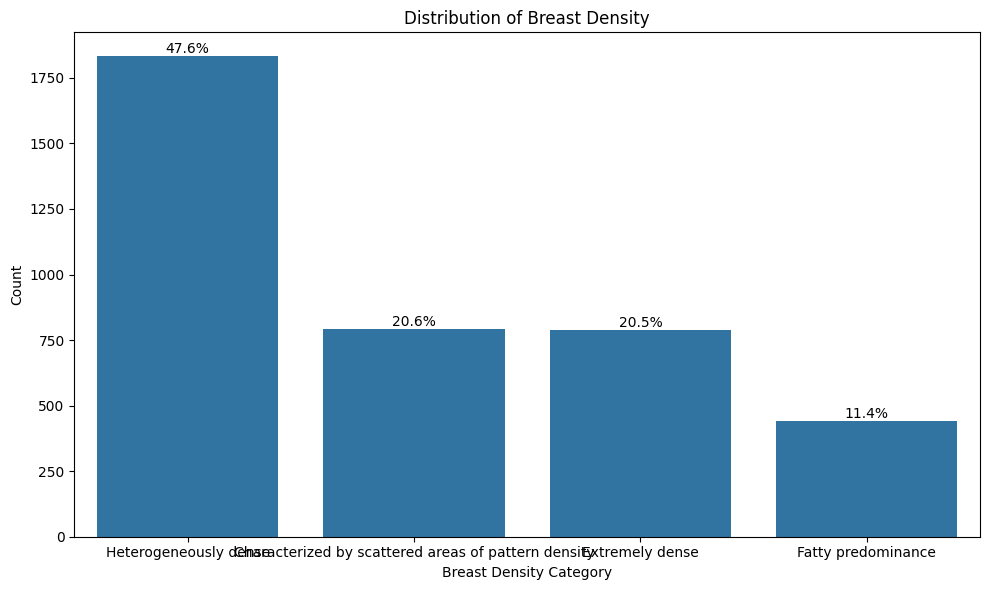


Summary Statistics:
Total number of cases: 3852
Number of unique categories: 4
Mode (most common category): Heterogeneously dense
Missing values: 0


In [ ]:

def analyze_breast_density(df):
    """
    Provides comprehensive analysis of breast density distribution.
    
    Args:
        df (pd.DataFrame): DataFrame containing 'breast_density' column
    """
    # Get basic statistics
    density_stats = df['breast_density'].value_counts()
    density_percentages = df['breast_density'].value_counts(normalize=True) * 100
    
    # Print numerical summary
    print("Breast Density Distribution:")
    print("\nCount and Percentage by Category:")
    for density, count in density_stats.items():
        percentage = density_percentages[density]
        print(f"Category {density}: {count} cases ({percentage:.1f}%)")
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='breast_density', order=density_stats.index)
    plt.title('Distribution of Breast Density')
    plt.xlabel('Breast Density Category')
    plt.ylabel('Count')
    
    # Add percentage labels on top of each bar
    total = len(df)
    for i, count in enumerate(density_stats):
        percentage = (count/total) * 100
        plt.text(i, count, f'{percentage:.1f}%', 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Additional statistics
    print("\nSummary Statistics:")
    print(f"Total number of cases: {len(df)}")
    print(f"Number of unique categories: {df['breast_density'].nunique()}")
    print(f"Mode (most common category): {df['breast_density'].mode()[0]}")
    print(f"Missing values: {df['breast_density'].isnull().sum()}")

# Usage:
# df = pd.read_csv('your_dataframe.csv')
analyze_breast_density(df)

In [ ]:
def create_json_entry(row):
    """Create a JSON entry for a single row with the new structure."""
    img_name = row['img_name']
    
    entry = {
        "filename": img_name,
        "report": row['breast_density'],
        "image_path": f"4kimages/{img_name}"
    }
    return entry

def generate_balanced_train_test_json(df, min_samples=440, max_samples=460, train_ratio=0.85, random_seed=42):
    """
    Creates balanced datasets with approximately equal representation of each breast density class.
    
    Args:
        df: DataFrame with 'img_name' and 'breast_density' columns
        min_samples: Minimum number of samples per class
        max_samples: Maximum number of samples per class
        train_ratio: Ratio of data to use for training (default: 0.8)
        random_seed: Random seed for reproducibility
    """
    # Set random seed for reproducibility
    random.seed(random_seed)
    
    # Get balanced dataset
    balanced_cases = []
    
    # Group by breast density category
    grouped = df.groupby('breast_density')
    
    # For each category, take samples within the specified range
    for category, group in grouped:
        cases = group['img_name'].tolist()
        if len(cases) > max_samples:
            # If we have more cases than max_samples, randomly select between min and max
            target_samples = random.randint(min_samples, max_samples)
            cases = random.sample(cases, target_samples)
        elif len(cases) < min_samples:
            print(f"Warning: Category '{category}' has fewer than {min_samples} cases ({len(cases)} available)")
            # Use all available cases if we have fewer than minimum
            cases = cases
        balanced_cases.extend(cases)
        print(f"Category '{category}': {len(cases)} cases")
    
    # Randomly shuffle all cases
    random.shuffle(balanced_cases)
    
    # Split into train and test
    split_idx = int(len(balanced_cases) * train_ratio)
    train_cases = balanced_cases[:split_idx]
    test_cases = balanced_cases[split_idx:]
    
    # Create train and test datasets
    train_data = []
    test_data = []
    
    # Process training data
    for case in train_cases:
        row = df[df['img_name'] == case].iloc[0]
        train_data.append(create_json_entry(row))
    
    # Process testing data
    for case in test_cases:
        row = df[df['img_name'] == case].iloc[0]
        test_data.append(create_json_entry(row))
    
    # Save to JSON files
    with open('/Users/YusMolina/Documents/tesis/biomedCLIP/data/datosMex/images/train_balanced.json', 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent=4)
    
    with open('/Users/YusMolina/Documents/tesis/biomedCLIP/data/datosMex/images/test_balanced.json', 'w', encoding='utf-8') as f:
        json.dump(test_data, f, ensure_ascii=False, indent=4)
    
    print("\nDataset statistics:")
    print(f"Total balanced cases: {len(balanced_cases)}")
    print(f"Training set size: {len(train_data)}")
    print(f"Testing set size: {len(test_data)}")
    
    # Print class distribution in train and test sets
    print("\nClass distribution:")
    train_dist = pd.DataFrame(train_data)['report'].value_counts()
    test_dist = pd.DataFrame(test_data)['report'].value_counts()
    print("\nTraining set:")
    print(train_dist)
    print("\nTesting set:")
    print(test_dist)

Balancing Strategy:

Limits each class to 440-460 samples
Randomly samples from over-represented classes
Warns if any class has insufficient samples

In [14]:
generate_balanced_train_test_json(shuffled_df)

Category 'Characterized by scattered areas of pattern density': 460 cases
Category 'Extremely dense': 443 cases
Category 'Fatty predominance': 440 cases
Category 'Heterogeneously dense': 442 cases

Dataset statistics:
Total balanced cases: 1785
Training set size: 1517
Testing set size: 268

Class distribution:

Training set:
report
Characterized by scattered areas of pattern density    392
Extremely dense                                        377
Fatty predominance                                     374
Heterogeneously dense                                  374
Name: count, dtype: int64

Testing set:
report
Characterized by scattered areas of pattern density    68
Heterogeneously dense                                  68
Extremely dense                                        66
Fatty predominance                                     66
Name: count, dtype: int64
